In [ ]:
#Importing libraries
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3



In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
#ACTUALLY GENERATING THE RELEVANT DATA

In [ ]:

# TRAIN_PATH = '/content/gdrive/My Drive/CellNucleiSegmentation/stage1_train/'
# TEST_PATH = '/content/gdrive/My Drive/CellNucleiSegmentation/stage1_test/'

# train_ids = next(os.walk(TRAIN_PATH))[1]
# test_ids = next(os.walk(TEST_PATH))[1]

# X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

In [ ]:
# print('Resizing training images and masks')
# for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
#     path = TRAIN_PATH + id_
#     img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_train[n] = img  
#     mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
#     for mask_file in next(os.walk(path + '/masks/'))[2]:
#         mask_ = imread(path + '/masks/' + mask_file)
#         mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
#                                       preserve_range=True), axis=-1)
#         mask = np.maximum(mask, mask_)  
            
#     Y_train[n] = mask   

# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []
# print('Resizing test images') 
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     path = TEST_PATH + id_
#     img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
#     sizes_test.append([img.shape[0], img.shape[1]])
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img

# print('Done!')

  0%|          | 0/670 [00:00<?, ?it/s]

Resizing training images and masks


  0%|          | 0/65 [00:00<?, ?it/s]

Resizing test images


100%|██████████| 65/65 [00:31<00:00,  2.06it/s]

Done!


In [ ]:
import pickle

In [ ]:
# filename = '/content/gdrive/My Drive/CellNucleiSegmentation/X_train'
# outfile = open(filename,'wb')

In [ ]:
# pickle.dump(X_train,outfile)
# outfile.close()

In [ ]:
# filename = '/content/gdrive/My Drive/CellNucleiSegmentation/X_test'
# outfile = open(filename,'wb')

In [ ]:
# pickle.dump(X_test,outfile)
# outfile.close()

In [ ]:
# filename = '/content/gdrive/My Drive/CellNucleiSegmentation/Y_train'
# outfile = open(filename,'wb')

In [ ]:
# pickle.dump(Y_train,outfile)
# outfile.close()

In [ ]:
#IMPORTING THE DATA FROM THE SCARED FILES

In [ ]:
X_test_file = open('/content/gdrive/My Drive/CellNucleiSegmentation/X_test','rb')
X_test = pickle.load(X_test_file)
X_train_file = open('/content/gdrive/My Drive/CellNucleiSegmentation/X_train','rb')
X_train = pickle.load(X_train_file)
Y_train_file = open('/content/gdrive/My Drive/CellNucleiSegmentation/Y_train','rb')
Y_train = pickle.load(Y_train_file)

In [ ]:
TRAIN_PATH = '/content/gdrive/My Drive/CellNucleiSegmentation/stage1_train/'
TEST_PATH = '/content/gdrive/My Drive/CellNucleiSegmentation/stage1_test/'
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

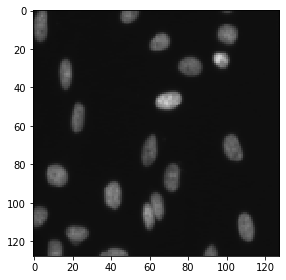

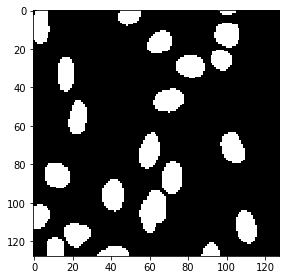

In [ ]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [ ]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#U-net architecture
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
_______________________________________________________________________________________

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/CellNucleiSegmentation/model_checkpoint/model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss'),
        checkpointer]
#Training the data
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=100, callbacks=callbacks)

Epoch 1/100
37/38 [============================>.] - ETA: 0s - loss: 0.0865 - accuracy: 0.9665
Epoch 00001: val_loss improved from inf to 0.08179, saving model to /content/gdrive/My Drive/CellNucleiSegmentation/model_checkpoint/model_for_nuclei.h5
38/38 [==============================] - 2s 45ms/step - loss: 0.0869 - accuracy: 0.9663 - val_loss: 0.0818 - val_accuracy: 0.9692
Epoch 2/100
37/38 [============================>.] - ETA: 0s - loss: 0.0847 - accuracy: 0.9668
Epoch 00002: val_loss improved from 0.08179 to 0.08076, saving model to /content/gdrive/My Drive/CellNucleiSegmentation/model_checkpoint/model_for_nuclei.h5
38/38 [==============================] - 1s 30ms/step - loss: 0.0842 - accuracy: 0.9670 - val_loss: 0.0808 - val_accuracy: 0.9700
Epoch 3/100
37/38 [============================>.] - ETA: 0s - loss: 0.0844 - accuracy: 0.9673
Epoch 00003: val_loss improved from 0.08076 to 0.07981, saving model to /content/gdrive/My Drive/CellNucleiSegmentation/model_checkpoint/model_fo

In [ ]:
X_train.shape

(670, 128, 128, 3)

In [ ]:
X_train[:115].shape

(115, 128, 128, 3)

In [ ]:
X_train[1,1,1,1]

198

In [ ]:
X_train[:int(X_train.shape[0]*0.9)].shape

(603, 128, 128, 3)

In [ ]:
#PREDICTIONS

3/3 [==============================] - 0s 39ms/step


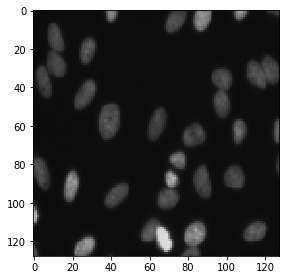

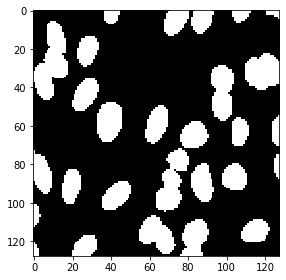

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


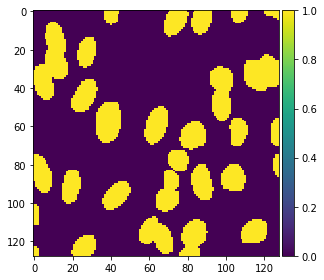

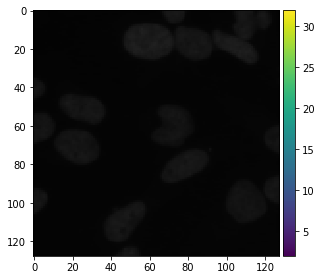

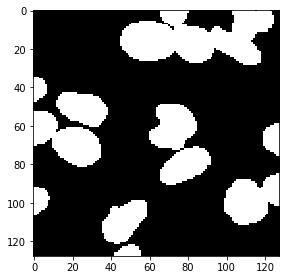

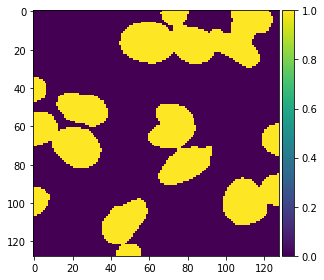

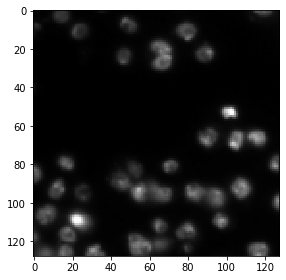

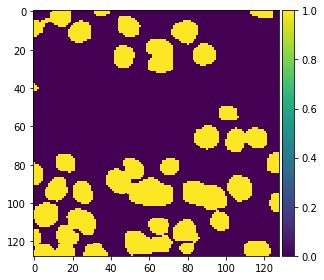

In [ ]:

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


rand = random.randint(0, len(preds_train_t))
imshow(X_train[rand])
plt.show()
imshow(np.squeeze(Y_train[rand]))
plt.show()
imshow(np.squeeze(preds_train_t[rand]))
plt.show()

rand = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][rand])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][rand]))
plt.show()
imshow(np.squeeze(preds_val_t[rand]))
plt.show()

rand = random.randint(0, len(preds_test_t))
imshow(X_test[rand])
plt.show()
imshow(np.squeeze(preds_test_t[rand]))
plt.show()


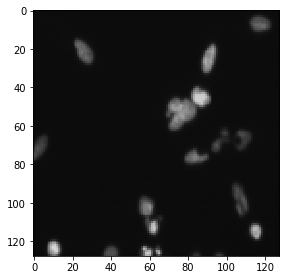

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


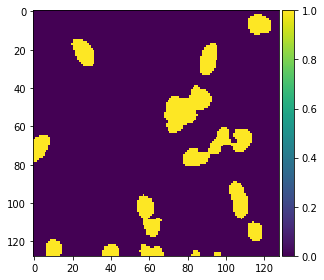

In [ ]:
rand = random.randint(0, len(preds_test_t))
imshow(X_test[rand])
plt.show()
imshow(np.squeeze(preds_test_t[rand]))
plt.show()

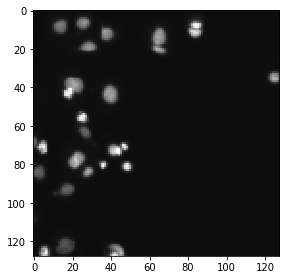

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


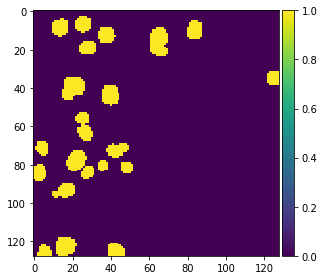

In [ ]:
rand = random.randint(0, len(preds_test_t))
imshow(X_test[rand])
plt.show()
imshow(np.squeeze(preds_test_t[rand]))
plt.show()

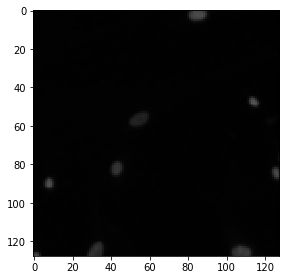

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


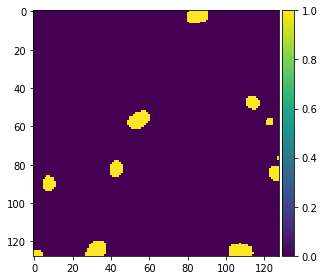

In [ ]:
rand = random.randint(0, len(preds_test_t))
imshow(X_test[rand])
plt.show()
imshow(np.squeeze(preds_test_t[rand]))
plt.show()

In [ ]:
    model.save('/content/gdrive/My Drive/CellNucleiSegmentation/Models')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/CellNucleiSegmentation/Models/assets
